In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cProfile
from scipy.optimize import bisect, brentq, newton

In [11]:
def bisekcja(f, a, b, eps=1e-10, max_iter=1000):    
    fa = f(a)
    fb = f(b)
    it = 0
    ADD = 0
    MUL = 1
    if fa * fb > 0:
        raise ValueError("f(a)*f(b) > 0")
    
    for _ in range(max_iter):
        it += 1
        ADD += 1
        MUL += 1
        c = (a + b) / 2
        fc = f(c)
        
        ADD += 1
        MUL += 1
        if abs(fc) < eps or (b - a) / 2 < eps:
            return c, it, ADD, MUL
        
        MUL += 1
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    
    ADD += 1
    MUL += 1
    return (a + b) / 2, it, ADD, MUL

In [12]:
def brent(f, a, b, eps=1e-10, max_iter=1000):
    fa = f(a)
    fb = f(b)
    ADD = 0
    MUL = 1
    if fa * fb > 0:
        raise ValueError("f(a)*f(b) > 0")

    c = a  
    fc = fa
    it = 0
    for _ in range(max_iter):
        it += 1
        fa = f(a)
        fb = f(b)
        fc = f(c)

        ADD += 3
        MUL += 2
        denom = (fa - fb) * (fb - fc) * (fc - fa)
        if denom != 0:
            ADD += 5
            MUL += 10
            x_interp = -(
                a * fb * fc * (fb - fc)
                + b * fc * fa * (fc - fa)
                + c * fa * fb * (fa - fb)
            ) / denom
        else:
            x_interp = None

        if x_interp is not None and min(a, b) < x_interp < max(a, b):
            x_new = x_interp
        else:
            ADD += 1
            MUL += 1
            x_new = (a + b) / 2

        fx = f(x_new)

        MUL += 1
        if fa * fx < 0:
            b, fb = x_new, fx
        else:
            a, fa = x_new, fx

        c = b

        ADD += 1
        if abs(b - a) < eps:
            ADD += 1
            MUL += 1
            return (a + b) / 2, it, ADD, MUL
    ADD += 1
    MUL += 1
    return (a + b) / 2, it, ADD, MUL

In [13]:
def sieczne(f, x0, x1, eps=1e-10, max_iter=100):

    f0 = f(x0)
    f1 = f(x1)
    it = 0
    ADD = 0
    MUL = 0
    for _ in range(max_iter):
        it += 1
        if f1 == f0:
            raise ZeroDivisionError("Dzielenie przez zero")

        ADD += 3
        MUL += 2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)

        ADD += 1
        if abs(x2 - x1) < eps:
            return x2, it, ADD, MUL

        x0, x1 = x1, x2
        f0, f1 = f1, f(x1)

    return x1, it, ADD, MUL


In [14]:
def my_newton(f, b, df=None, eps=1e-10, max_iter=100, h=1e-6):

    x = b
    it = 0
    ADD = 0
    MUL = 0
    for _ in range(max_iter):
        it += 1
        fx = f(x)
        if df == None:
            ADD += 2
            MUL += 1
            dfx = (f(x + h) - fx) / h
        else:
            dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Dzielenie przez zero")

        ADD += 1
        MUL += 1
        x_new = x - fx / dfx
        
        ADD += 1
        if abs(x_new - x) < eps:
            return x_new, it, ADD, MUL

        x = x_new
        #print(fx, dfx, x)

    return x, it, ADD, MUL


## Zadanie 1

In [16]:
def z1(x):
    return np.tan(np.pi - x) - x

def dz1(x):
    return -1 - 1/np.cos(x)**2
a = -0.5
b = 0.65

x1_bisekcja, it1_bisekcja, ADD1_bisekcja, MUL1_bisekcja = bisekcja(z1, a, b)
x1_brent, it1_brent, ADD1_brent, MUL1_brent = brent(z1, a, b)
x1_sieczne, it1_sieczne, ADD1_sieczne, MUL1_sieczne = sieczne(z1, a, b)
x1_newton, it1_newton, ADD1_newton, MUL1_newton = my_newton(z1, b, dz1)

print("x: ", x1_bisekcja, x1_brent, x1_sieczne, x1_newton)
print("f(x): ", z1(x1_bisekcja), z1(x1_brent), z1(x1_sieczne), z1(x1_newton))
print("Iteracje: ", it1_bisekcja, it1_brent, it1_sieczne, it1_newton)
print("Dodawanie: ", ADD1_bisekcja, ADD1_brent, ADD1_sieczne, ADD1_newton)
print("Mnożenie: ", MUL1_bisekcja, MUL1_brent, MUL1_sieczne, MUL1_newton)

x:  8.73115848944233e-12 -2.4738246535801433e-11 -1.6535782516321117e-16 -1.5783475352553572e-16
f(x):  -1.7462518908984326e-11 4.9476557595029107e-11 4.2893145248475845e-17 3.53700736108004e-17
Iteracje:  34 34 5 4
Dodawanie:  68 171 20 8
Mnożenie:  102 138 10 4


In [21]:
x1_bisekcja_scipy = bisect(z1, a=a, b=b)
x1_brent_scipy = brentq(z1, a=a, b=b)
x1_sieczne_scipy = newton(z1, x0=a, x1=b)
x1_newton_scipy = newton(z1, x0=b, fprime=dz1)
print(x1_bisekcja_scipy, x1_brent_scipy, x1_sieczne_scipy, x1_newton_scipy)

-6.821596427827266e-13 -5.829587827344157e-17 -1.5547612802176394e-15 -1.5783475352553572e-16


## Zadanie 2

Text(0, 0.5, 'f(x)')

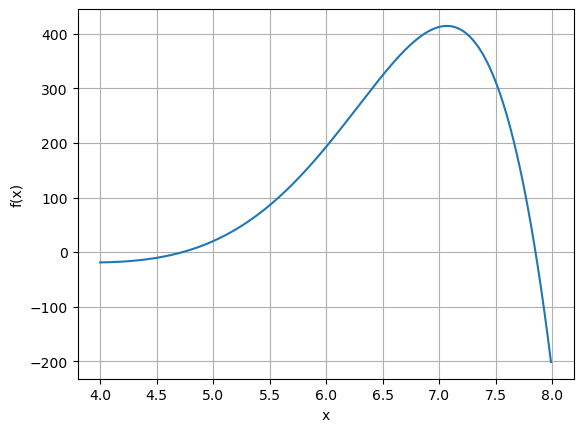

In [57]:
def z2(x):
    return np.cosh(x) * np.cos(x) - 1

def dz2(x):
    return np.cos(x) * np.sinh(x) - np.sin(x)*np.cosh(x)

xs = np.arange(4, 8, 0.01)

plt.plot(xs, z2(xs))
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

In [55]:
x2, _ = my_newton(z2, 4, dz2)
print(x2)

x2_scipy = newton(z2, 4, fprime=dz2)
print(x2_scipy)


10.995607838001671
10.995607838001671


## Zadanie 3

70.87797226804469
70.87797226808021


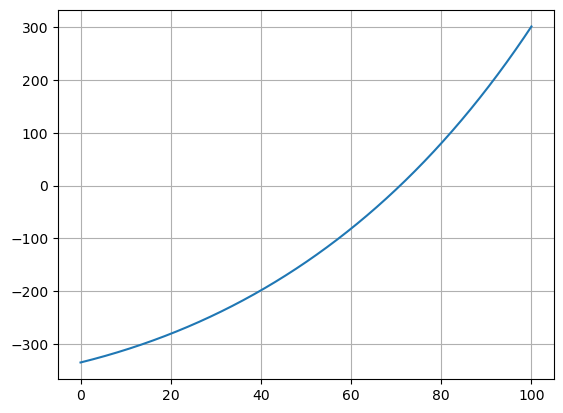

In [77]:
def v(t, u=2510, M0=2.8e6, m=13.3e3, g=9.81):
    return u*np.log(M0/(M0-m*t))-g*t - 335

t = np.arange(0, 100, 0.01)
plt.plot(t, v(t))
plt.grid()

t_bisekcja, _ = bisekcja(v, 0, 100)
print(t_bisekcja)
t_bisekcja_scipy = bisect(v, 0, 100)
print(t_bisekcja_scipy)

## Zadanie 4

904.9425832328618
904.9425832328806


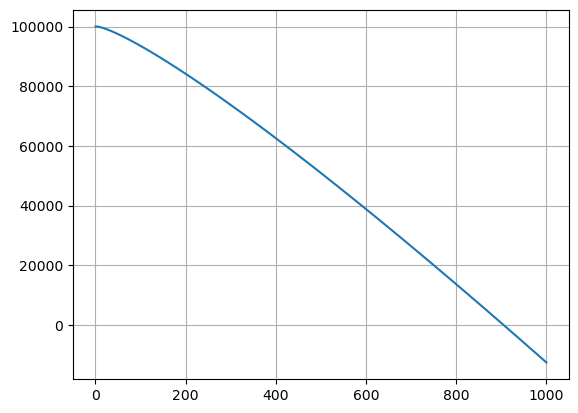

In [95]:
def G(T, R=8.31441, T0=4.44418):
    return -R*T*np.log((T/T0)**(5/2)) + 1e5

T = np.arange(0.1, 1000, 0.1)
plt.plot(T, G(T))
plt.grid()

T_brent, _ = brent(G, 0.1, 1000)
print(T_brent)
T_brent_scipy = brentq(G, 0.1, 1000)
print(T_brent_scipy)

## Zadanie 5

In [34]:
import numpy as np

def F(X):
    x, y = X
    return np.array([
        np.tan(x) - y - 1,
        np.cos(x) - 3*np.sin(y)
    ])

def dF(X):
    x, y = X
    return np.array([
        [1/np.cos(x)**2, -1],
        [-np.sin(x), -3*np.cos(y)]
    ])

def newton_ogolny(F, dF, X0, eps=1e-10, max_iter=50):
    X = np.array(X0, dtype=float)
    for _ in range(max_iter):
        FX = F(X)
        if np.linalg.norm(FX) < eps:
            return X
        dFX = dF(X)
        delta = np.linalg.solve(dFX, FX)
        X = X - delta
    return None

solutions = []

for x0 in np.linspace(0, 1.5, 15):
    for y0 in np.linspace(-2, 2, 15):
        sol = newton_ogolny(F, dF, (x0, y0))
        if sol is not None:
            x, y = sol
            if 0 < x < 1.5:
                sol_round = (round(x, 6), round(y, 6))
                if sol_round not in solutions:
                    solutions.append(sol_round)

print(solutions)


[(0.881593, 0.213595), (1.435176, 6.328269), (1.329402, 3.061823), (1.474872, 9.392847)]


## Zadanie 6

In [22]:
wspolczynniki = [1, 5+1j, -8+5j, 30-14j,-84]


def laguerre_one_root(coefs, z0=0+0j, eps=1e-12, max_iter=100):
    n = len(coefs) - 1
    z = complex(z0)

    for _ in range(max_iter):

        w = np.polyval(coefs, z)
        d1 = np.polyval(np.polyder(coefs), z)
        d2 = np.polyval(np.polyder(np.polyder(coefs)), z)

        if abs(w) < eps:
            return z

        H = (n - 1) * ((n - 1) * d1**2 - n * w * d2)

        denom1 = d1 + np.sqrt(H)
        denom2 = d1 - np.sqrt(H)
        if abs(denom1) > abs(denom2):
            a = n * w / denom1
        else:
            a = n * w / denom2

        z_new = z - a

        if abs(z_new - z) < eps:
            return z_new
        z = z_new

    return z


def laguerre(coefs, eps=1e-12):
    coefs = np.array(coefs, dtype=complex)
    roots = []
    current = coefs.copy()

    while len(current) > 2:
        root = laguerre_one_root(current, z0=0+0j, eps=eps)

        roots.append(root)

        q, r = np.polydiv(current, [1, -root])
        current = np.trim_zeros(q, 'f')

    a, b = current
    roots.append(-b / a)

    return roots


print(laguerre(wspolczynniki))
print(np.round(laguerre(wspolczynniki)))

print(np.roots(wspolczynniki))
print(np.round(np.roots(wspolczynniki)))

[(-9.527638348953184e-18+2j), (2-2.0622544663014658e-17j), -3j, (-7+0j)]
[-0.+2.j  2.-0.j  0.-3.j -7.+0.j]
[-7.00000000e+00+0.0000000e+00j -3.09488263e-16-3.0000000e+00j
  2.00000000e+00+9.8223356e-16j  1.80012326e-16+2.0000000e+00j]
[-7.+0.j -0.-3.j  2.+0.j  0.+2.j]
